# Day 3: Protein Mix Spike-Ins

In [162]:
from cdk.analysis.cytosol import platereader as pr
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Initialize plotting
pr.plot_setup()

# Load the data

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

In [163]:
platemap_path = "../1-design/20250514-OPWS-blueteam.tsv"
data_path = "../2-data/20250514-211604-pure-timecourse-gfp-nucleus-pure-workshop-day3-protein-mix-debug-biotek-cdk.txt"


data, platemap = pr.load_platereader_data(data_path, platemap_path)
platemap

,Well,Sample #,Type,Name,ArgRS,T7 RNAP,IF2,EF-TU,T7 RNAP (ctrl),ArgRS (ctrl),IF2 (ctrl),EF-TU (ctrl),plamGFP (ug/uL)
0,B2,1,Control,NEB +,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B3,2,Control,NEB -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B4,3,Control,OP +,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B5,4,Control,OP -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B6,5,Control,Ribo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,K8,99,Standard,plamGFP-75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.00
105,K10,100,Standard,plamGFP-100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
106,K12,101,Standard,plamGFP-125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.00
107,K14,102,Standard,plamGFP-150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.00


# Basic Plots

## Kinetics 
Kinetic time traces of every well on the plate

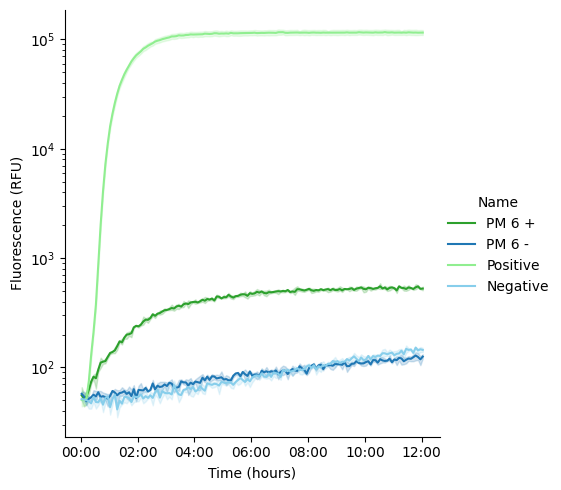

In [164]:
#| label: fig:day3-kinetics-controls

ctrl_data = data[data["Type"]=="Control"]

names_to_remove_0 = ['Ribo',
                   #'NEB +',
                   # 'NEB -',
                   # 'Ribo'
                  ]

replace_dict_0 = {'OP +':'PM 6 +',
                  'OP -':'PM 6 -',
                  'NEB +': 'Positive',
                  'NEB -': 'Negative',
                  }

custom_order_0 = ['PM 6 +', 
                  'PM 6 -',
                  'Positive', 
                  'Negative']

color_map_0 = {'PM 6 +':'#2ca02c',
             'PM 6 -':'#1f77b4',
             'Positive':'#90EE90',  
             'Negative':'#87CEEB'
               }

data_drop_ctrl_0 = ctrl_data.drop(ctrl_data[ctrl_data['Name'].isin(names_to_remove_0)].index)
data_drop_ctrl_0['Name'] = data_drop_ctrl_0['Name'].replace(replace_dict_0)


pr.plot_curves(data_drop_ctrl_0, palette=color_map_0, hue_order=custom_order_0);
plt.yscale('log')

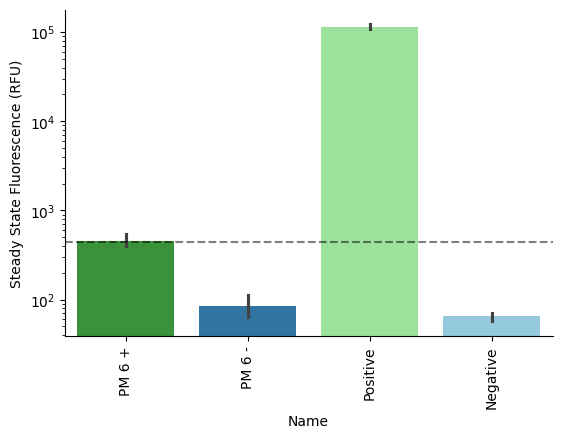

In [160]:
#| label: fig:day3-steadystate-controls

pr.plot_steadystate(data_drop_ctrl_0, order=list(color_map_0.keys()), palette=color_map_0);
plt.yscale('log')
plt.axhline(y=443, color='black', linestyle='--', alpha=0.5);

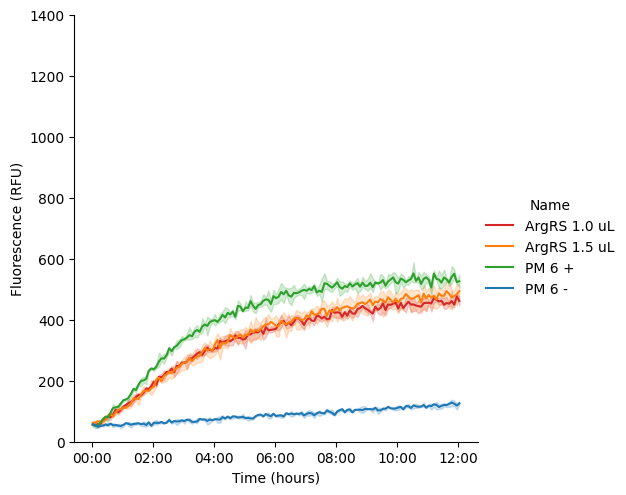

In [168]:
#| label: fig:day3-kinetics-argrs

argrs_data = data[(~pd.isna(data["ArgRS"]) & (data["ArgRS"] > 0.5))]
argrs_ctrl_data = data[(~pd.isna(data["ArgRS (ctrl)"]) & (data["ArgRS (ctrl)"] > 0.5))]

argsrs_comb_data = pd.concat([argrs_data, argrs_ctrl_data, data_drop_ctrl])

# names_to_remove = ['ArgRS 1 uL',
#                    'ArgRS 1.5 uL'
#                   ]

# replace_dict = {'ArgsRS (ctrl) 1.0 uL':'ArgRS 1.0 uL',
#                 'ArgRS (ctrl) 1.5 uL':'ArgRS 1.5 uL',
#                 'OP +':'PM 6 +',
#                 'OP -':'PM 6 -'}

names_to_remove_1 = ['ArgsRS (ctrl) 1.0 uL',
                   'ArgRS (ctrl) 1.5 uL'
                  ]

replace_dict_1 = {'ArgRS 1 uL':'ArgRS 1.0 uL',
                'ArgRS 1.5 uL':'ArgRS 1.5 uL',
                'OP +':'PM 6 +',
                'OP -':'PM 6 -'}

custom_order_1 = ['ArgRS 1.0 uL', 
                'ArgRS 1.5 uL',
                'PM 6 +', 
                'PM 6 -']

color_map_1 = {'ArgRS 1.0 uL':'#d62728',
             'ArgRS 1.5 uL':'#ff7f0e',
             'PM 6 +':'#2ca02c',
             'PM 6 -':'#1f77b4'
               }

argsrs_comb_data_drop = argsrs_comb_data.drop(argsrs_comb_data[argsrs_comb_data['Name'].isin(names_to_remove_1)].index)
argsrs_comb_data_drop['Name'] = argsrs_comb_data_drop['Name'].replace(replace_dict_1)

argrs_plot = pr.plot_curves(argsrs_comb_data_drop, palette=color_map_1);
argrs_plot.set(ylim=(0, 1400));

# pr.plot_curves(argsrs_comb_data);

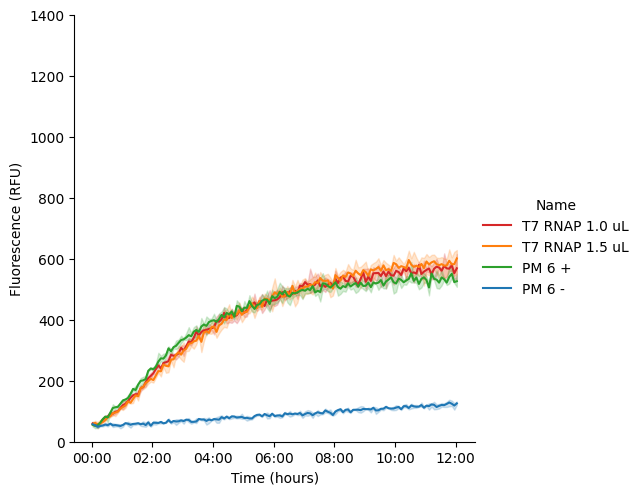

In [133]:
#| label: fig:day3-kinetics-t7rnap

t7rnap_data = data[(~pd.isna(data["T7 RNAP"]) & (data["T7 RNAP"] > 0.5))]
t7rnap_ctrl_data = data[(~pd.isna(data["T7 RNAP (ctrl)"]) & (data["T7 RNAP (ctrl)"] > 0.5))]

t7rnap_comb_data = pd.concat([t7rnap_data, t7rnap_ctrl_data, data_drop_ctrl])

# names_to_remove = ['T7 RNAP 1 uL',
#                    'T7 RNAP 1.5 uL',
#                    '1 uL T7 RNAP + 1 uL EF-TU (ctrl)'
#                   ]


# replace_dict = {'T7 RNAP (ctrl) 1.0 uL':'T7 RNAP 1.0 uL',
#                 'T7 RNAP (ctrl) 1.5 uL':'T7 RNAP 1.5 uL',
#                 'OP +':'PM 6 +',
#                 'OP -':'PM 6 -'}

names_to_remove_2 = ['T7 RNAP (ctrl) 1.0 uL',
                   'T7 RNAP (ctrl) 1.5 uL',
                   '1 uL T7 RNAP + 1 uL EF-TU (ctrl)'
                  ]


replace_dict_2 = {'T7 RNAP 1 uL':'T7 RNAP 1.0 uL',
                'T7 RNAP 1.5 uL':'T7 RNAP 1.5 uL',
                'OP +':'PM 6 +',
                'OP -':'PM 6 -'}

custom_order_2 = ['T7 RNAP (ctrl) 1.0 uL', 
                'T7 RNAP (ctrl) 1.5 uL',
                'PM 6 +', 
                'PM 6 -']

color_map_2 = {'T7 RNAP 1.0 uL':'#d62728',
             'T7 RNAP 1.5 uL':'#ff7f0e',
             'PM 6 +':'#2ca02c',
             'PM 6 -':'#1f77b4'
               }

t7rnap_comb_data_drop = t7rnap_comb_data.drop(t7rnap_comb_data[t7rnap_comb_data['Name'].isin(names_to_remove_2)].index)
t7rnap_comb_data_drop['Name'] = t7rnap_comb_data_drop['Name'].replace(replace_dict_2)

t7rnap_plot = pr.plot_curves(t7rnap_comb_data_drop, palette=color_map_2);
t7rnap_plot.set(ylim=(0, 1400));

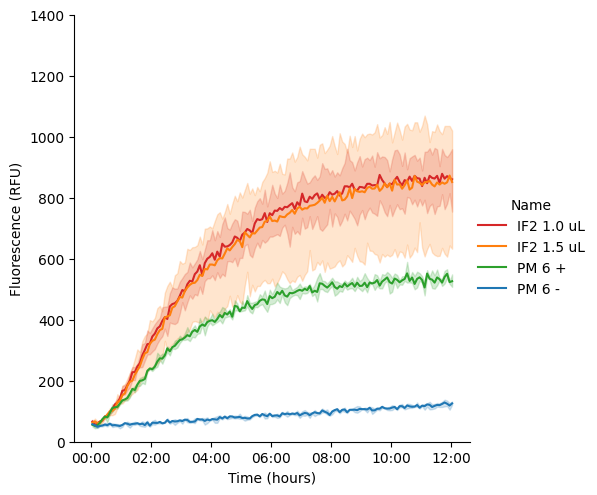

In [134]:
#| label: fig:day3-kinetics-if2

if2_data = data[(~pd.isna(data["IF2"]) & (data["IF2"] > 0.5))]
if2_ctrl_data = data[(~pd.isna(data["IF2 (ctrl)"]) & (data["IF2 (ctrl)"] > 0.5))]

if2_comb_data = pd.concat([if2_data, if2_ctrl_data, data_drop_ctrl])

# names_to_remove = ['IF2 1 uL',
#                    'IF 1.5 uL',
#                    '1 uL IF2 + 1 uL EF-TU'
#                   ]

names_to_remove_3 = ['IF2 (ctrl) 1.0 uL',
                   'IF2 (ctrl) 1.5 uL',
                   '1 uL IF2 + 1 uL EF-TU'
                  ]

# replace_dict = {'IF2 (ctrl) 1.0 uL':'IF2 1.0 uL',
#                 'IF2 (ctrl) 1.5 uL':'IF2 1.5 uL',
#                 'OP +':'PM 6 +',
#                 'OP -':'PM 6 -'}

replace_dict_3 = {'IF2 1 uL':'IF2 1.0 uL',
                'IF 1.5 uL':'IF2 1.5 uL',
                'OP +':'PM 6 +',
                'OP -':'PM 6 -'}

custom_order_3 = ['IF2 1.0 uL', 
                'IF2 1.5 uL',
                'PM 6 +', 
                'PM 6 -']

color_map_3 = {'IF2 1.0 uL':'#d62728',
             'IF2 1.5 uL':'#ff7f0e',
             # '1 uL IF2 + 1 uL EF-TU': 'Red',
             'PM 6 +':'#2ca02c',
             'PM 6 -':'#1f77b4'
               }

if2_comb_data_drop = if2_comb_data.drop(if2_comb_data[if2_comb_data['Name'].isin(names_to_remove_3)].index)
if2_comb_data_drop['Name'] = if2_comb_data_drop['Name'].replace(replace_dict_3)

if2_plot = pr.plot_curves(if2_comb_data_drop, palette=color_map_3);
if2_plot.set(ylim=(0, 1400));

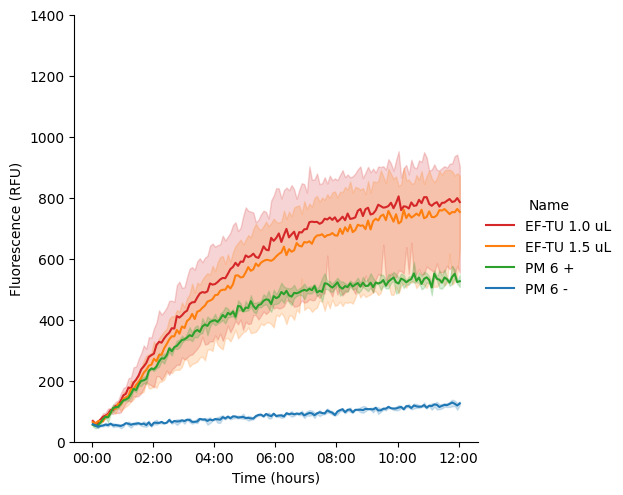

In [135]:
#| label: fig:day3-kinetics-eftu

eftu_data = data[(~pd.isna(data["EF-TU"]) & (data["EF-TU"] > 0.5))]
eftu_ctrl_data = data[(~pd.isna(data["EF-TU (ctrl)"]) & (data["EF-TU (ctrl)"] > 0.5))]

eftu_comb_data = pd.concat([eftu_data, eftu_ctrl_data, data_drop_ctrl])

names_to_remove_4 = ['EF-TU 1 uL',
                   'EF-TU 1.5 uL',
                   '1 uL IF2 + 1 uL EF-TU',
                   '1 uL T7 RNAP + 1 uL EF-TU (ctrl)'
                  ]

replace_dict_4 = {'EF-TU (ctrl) 1.0 uL':'EF-TU 1.0 uL',
                'EF-TU (ctrl) 1.5 uL':'EF-TU 1.5 uL',
                'OP +':'PM 6 +',
                'OP -':'PM 6 -'}

custom_order_4 = ['EF-TU 1.0 uL', 
                'EF-TU 1.5 uL',
                'PM 6 +', 
                'PM 6 -']

color_map_4 = {'EF-TU 1.0 uL':'#d62728',
             'EF-TU 1.5 uL':'#ff7f0e',
             'PM 6 +':'#2ca02c',
             'PM 6 -':'#1f77b4'
               }

eftu_comb_data_drop = eftu_comb_data.drop(eftu_comb_data[eftu_comb_data['Name'].isin(names_to_remove_4)].index)
eftu_comb_data_drop['Name'] = eftu_comb_data_drop['Name'].replace(replace_dict_4)

eftu_plot = pr.plot_curves(eftu_comb_data_drop, palette=color_map_4);
eftu_plot.set(ylim=(0, 1400));

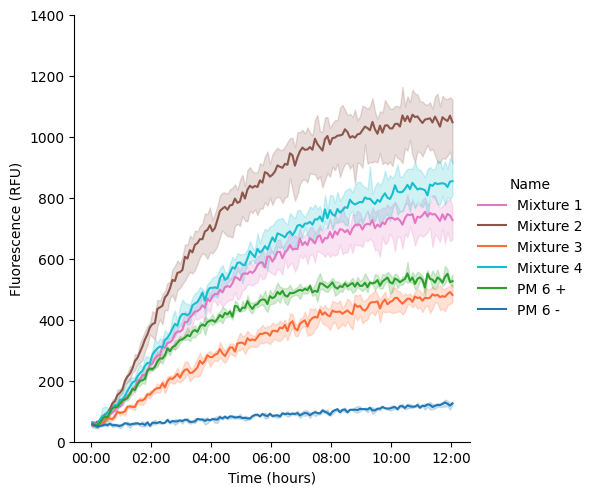

In [103]:
#| label: fig:day3-kinetics-pairwise

pair_data = data[data["Type"]=="Pairwise"]
pair_comb_data = pd.concat([pair_data, data_drop_ctrl])

names_to_remove_5 = ['1 uL IF2 + 1 uL EF-TU',
                   '0.5 uL T7 RNAP + 0.5 uL IF2 ',
                  ]

replace_dict_5 = {'0.5 uL T7 RNAP + 0.5 uL EF-TU (ctrl)':'Mixture 1',
                '0.5 uL IF2 + 0.5 uL EF-TU (ctrl)':'Mixture 2',
                '1 uL T7 RNAP + 1 uL EF-TU (ctrl)': 'Mixture 3',
                '0.5 uL ArgRS + 0.5 uL T7 RNAP + 0.5 uL IF 2 + 0.5 uL EF-TU (ctrl)': 'Mixture 4',
                'OP +':'PM 6 +',
                'OP -':'PM 6 -'}

custom_order_5 = ['0.5 uL T7 RNAP + 0.5 uL EF-TU', 
                '1 uL T7 RNAP + 1 uL EF-TU',
                '0.5 uL IF2 + 0.5 uL EF-TU',
                '0.5 uL ArgRS + 0.5 uL T7 RNAP + 0.5 uL IF 2 + 0.5 uL EF-TU',
                'PM 6 +', 
                'PM 6 -']

color_map_5 = {'Mixture 1': '#e377c2',     # Pink/Magenta
             'Mixture 2': '#8c564b',     # Brown
             'Mixture 3': '#ff6b35',     # Orange-Red
             'Mixture 4': '#17becf',     # Cyan
             'PM 6 +': '#2ca02c',     # Green (keep existing)
             'PM 6 -': '#1f77b4'      # Blue (keep existing)
            }

pair_comb_data_drop = pair_comb_data.drop(pair_comb_data[pair_comb_data['Name'].isin(names_to_remove_5)].index)
pair_comb_data_drop['Name'] = pair_comb_data_drop['Name'].replace(replace_dict_5)

pair_plot = pr.plot_curves(pair_comb_data_drop, palette=color_map_5);
pair_plot.set(ylim=(0, 1400));

## Steady state
Bar graph of steady-state endpoint of each sample. Steady state is calculated as the maximum fluorescence value over a 3-sample rolling average on the data.

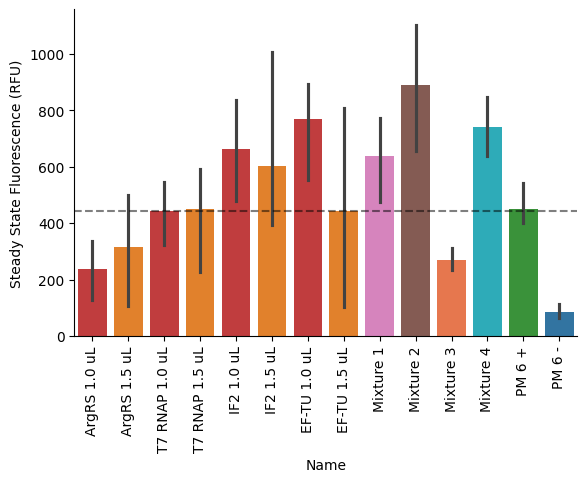

In [136]:
#| label: fig:day3-steadystate-pairwise

color_map_list = [
    color_map_1,
    color_map_2,
    color_map_3,
    color_map_4,
    color_map_5
]

color_map_list

flat_color_map = {k: v for color_map in color_map_list for k, v in color_map.items()}

pm_keys = ['PM 6 +', 'PM 6 -']
ordered_color_map = {k: v for k, v in flat_color_map.items() if k not in pm_keys}
ordered_color_map.update({k: flat_color_map[k] for k in pm_keys if k in flat_color_map})

pr.plot_steadystate(data_list_concat, order=list(ordered_dict.keys()), palette=ordered_color_map);
plt.axhline(y=443, color='black', linestyle='--', alpha=0.5);

# Kinetics Analysis
These functions calculate key kinetic parameters of the time series.

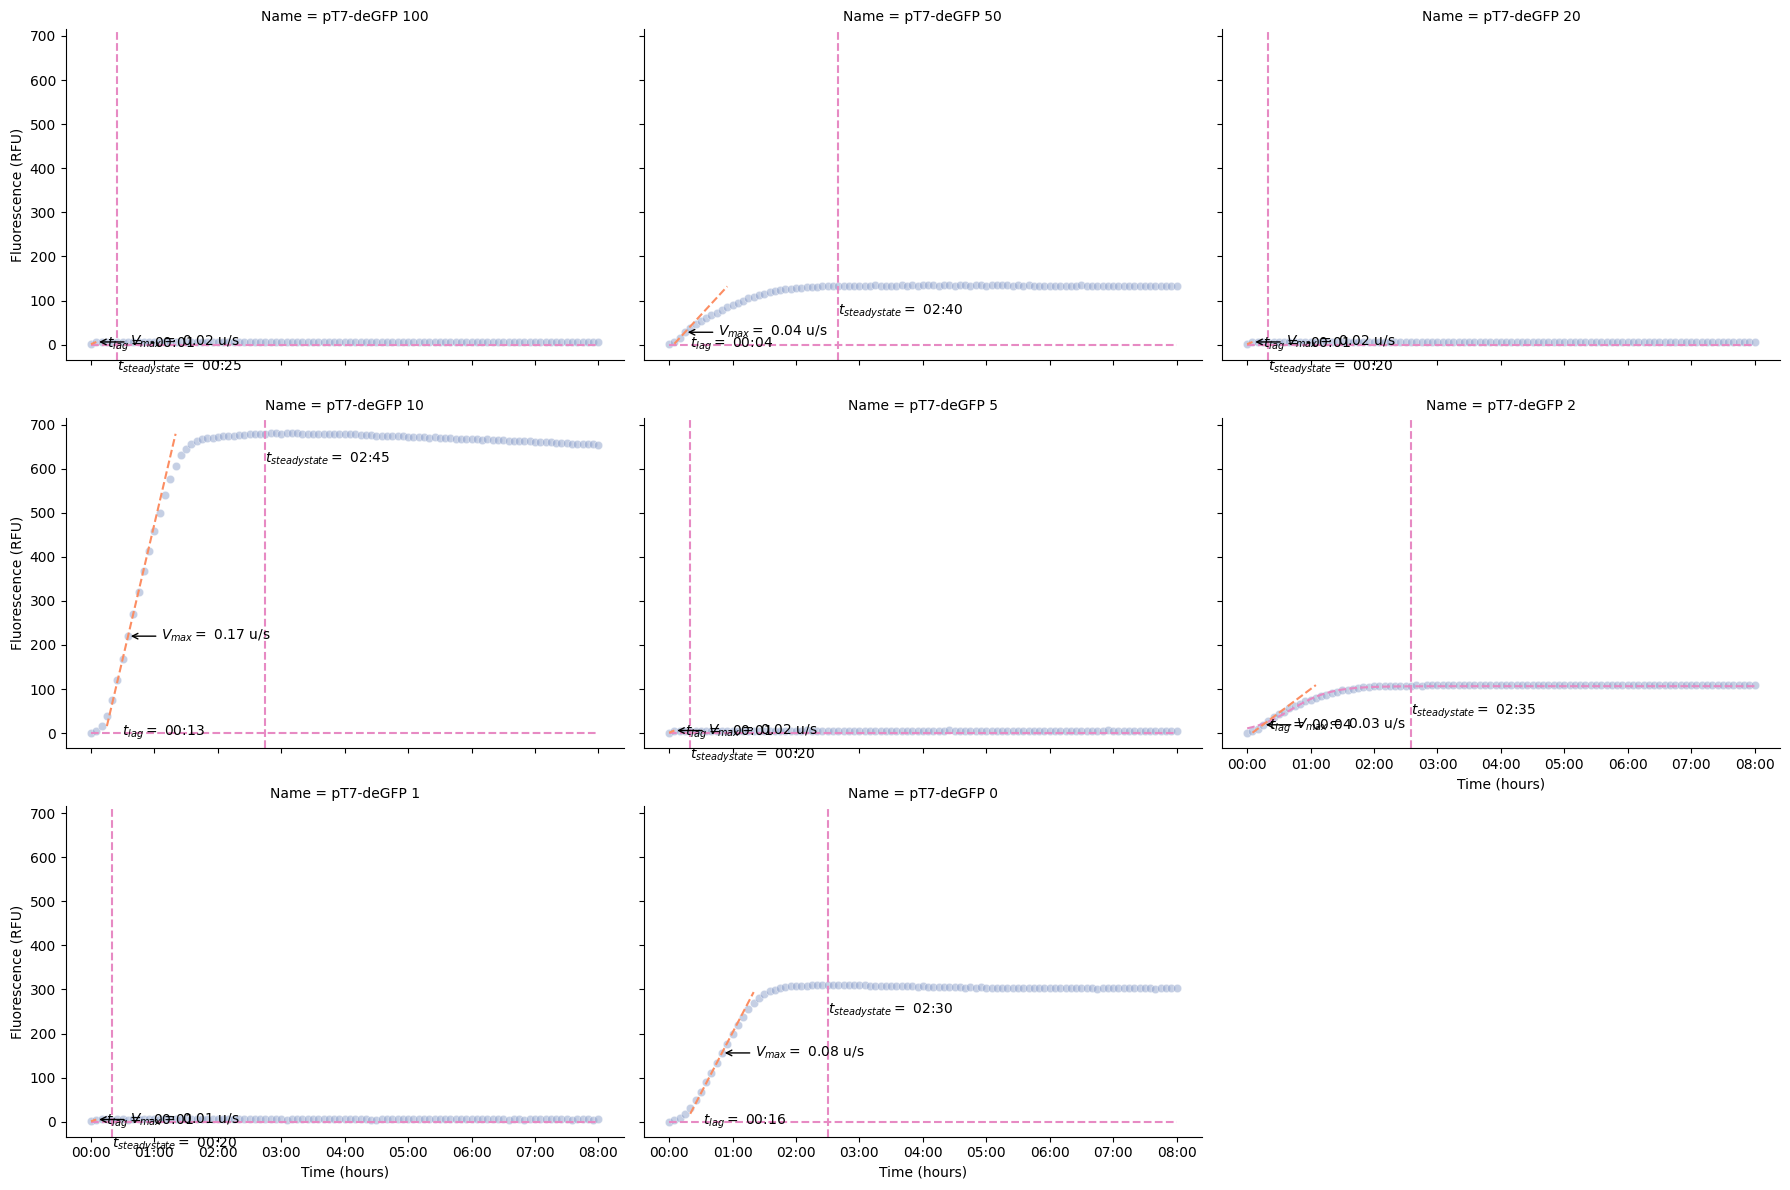

In [24]:
pr.plot_kinetics(data)

We can also calculate the kinetics and display the parameters as a table.

In [25]:
pr.kinetic_analysis(data)

Velocity              \
                                            Time   Data  Max   
Well Name          Read                                        
B1   pT7-deGFP 100 485/20,528/20 0 days 00:05:00   6.00 0.02   
B2   pT7-deGFP 50  485/20,528/20 0 days 00:15:00  28.00 0.04   
B3   pT7-deGFP 20  485/20,528/20 0 days 00:05:00   6.00 0.02   
B4   pT7-deGFP 10  485/20,528/20 0 days 00:35:00 220.00 0.17   
B5   pT7-deGFP 5   485/20,528/20 0 days 00:05:00   6.00 0.02   
B6   pT7-deGFP 2   485/20,528/20 0 days 00:15:00  19.00 0.03   
B7   pT7-deGFP 1   485/20,528/20 0 days 00:05:00   5.00 0.01   
B8   pT7-deGFP 0   485/20,528/20 0 days 00:50:00 156.00 0.08   

                                                       Lag        \
                                                      Time  Data   
Well Name          Read                                            
B1   pT7-deGFP 100 485/20,528/20         -1 days +23:59:00  0.00   
B2   pT7-deGFP 50  485/20,528/20 0 days 00:04:13.846153846  0.00   
B3   pT7-deGFP 20  485/20,528/20         -1 days +23:59:00  0.00   
B4   pT7-deGFP 10  485/20,528/20 0 days 00:13:25.882352941  0.00   
B5   pT7-deGFP 5   485/20,528/20         -1 days +23:59:00  0.00   
B6   pT7-deGFP 2   485/20,528/20 0 days 00:04:26.666666667 13.38   
B7   pT7-deGFP 1   485/20,528/20         -1 days +23:58:45  0.00   
B8   pT7-deGFP 0   485/20,528/20 0 days 00:16:05.217391304  0.00   

                                    Steady State           Fit               
                                            Time   Data      L    k      x0  
Well Name          Read                                                      
B1   pT7-deGFP 100 485/20,528/20 0 days 00:25:00   6.00   0.00 0.00    0.00  
B2   pT7-deGFP 50  485/20,528/20 0 days 02:40:00 132.00   0.00 0.00    0.00  
B3   pT7-deGFP 20  485/20,528/20 0 days 00:20:00   6.00   0.00 0.00    0.00  
B4   pT7-deGFP 10  485/20,528/20 0 days 02:45:00 679.00   0.00 0.00    0.00  
B5   pT7-deGFP 5   485/20,528/20 0 days 00:20:00   6.00   0.00 0.00    0.00  
B6   pT7-deGFP 2   485/20,528/20 0 days 02:35:00 108.00 106.53 0.00 2482.26  
B7   pT7-deGFP 1   485/20,528/20 0 days 00:20:00   5.00   0.00 0.00    0.00  
B8   pT7-deGFP 0   485/20,528/20 0 days 02:30:00 310.00   0.00 0.00    0.00